# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_study.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [65]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [66]:
duplicate_data = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26

In [67]:
duplicate_data_mouse = mouse_study.loc[mouse_study["Mouse ID"]=="g989"]
duplicate_data_mouse


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1     Propriva   
872     g989         35           62.570880                 2     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26  
870  Female          21          26  
871  Female          21          26  
872  Female          21          26

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 


In [68]:
mouse_study0=mouse_study.loc[mouse_study["Mouse ID"]!="g989"]
mouse_study0.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [69]:
mouse_study0['Mouse ID'].nunique()

248

In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [70]:
drug_sum = mouse_study0.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame().rename(columns = {'Tumor Volume (mm3)':'Mean Tumor Volume'})
drug_sum['Median Tumor Volume'] =  mouse_study0.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_sum['Tumor Volume Variance'] =  mouse_study0.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_sum['Tumor Volume Std. Dev.'] =  mouse_study0.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sum['Tumor Volume Std. Err.'] =  mouse_study0.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



drug_sum

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [124]:
#drug_sum = mouse_study0.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame().rename(columns = {'Tumor Volume (mm3)':'Mean Tumor Volume'})
drug_sum0 = mouse_study0.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_sum0

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

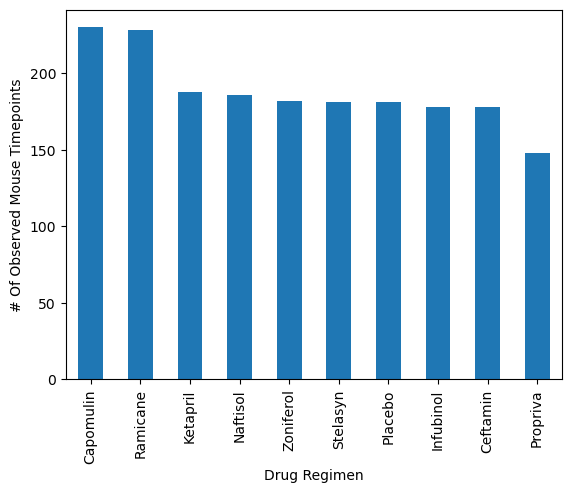

In [71]:
mouse_study0['Drug Regimen'].value_counts().plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.show()

In [72]:

counts = mouse_study0['Drug Regimen'].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

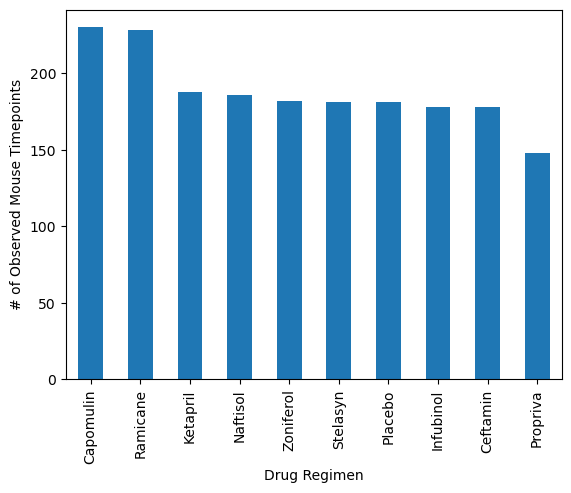

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


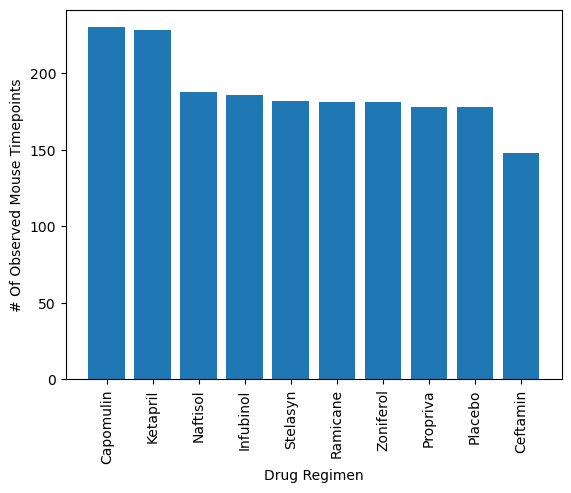

In [13]:
drugs = [value for value in mouse_study0['Drug Regimen'].unique()]
x = np.arange(len(drugs))
counts = mouse_study0['Drug Regimen'].value_counts()
plt.bar(x, counts)
plt.xticks(x,drugs, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.show()

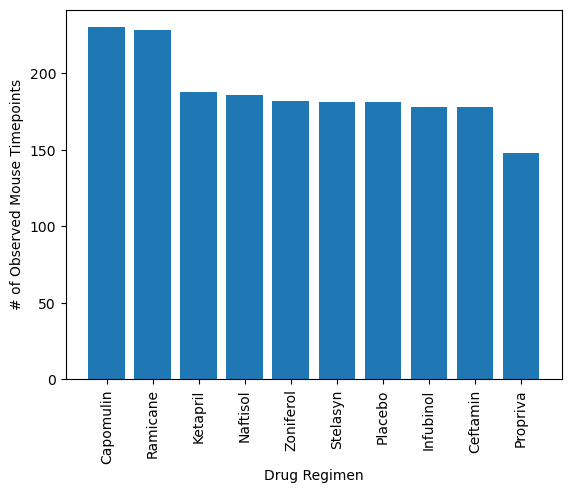

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


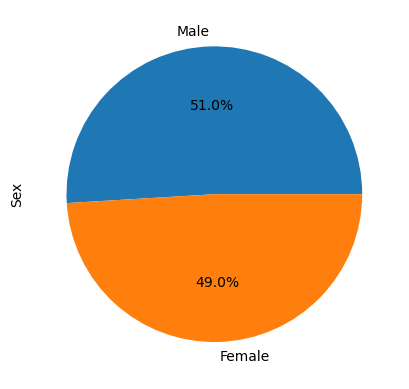

In [14]:
mouse_study0['Sex'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()
#https://www.easytweaks.com/plot-pandas-pie-chart/

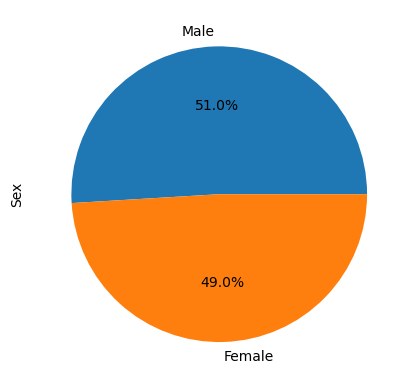

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


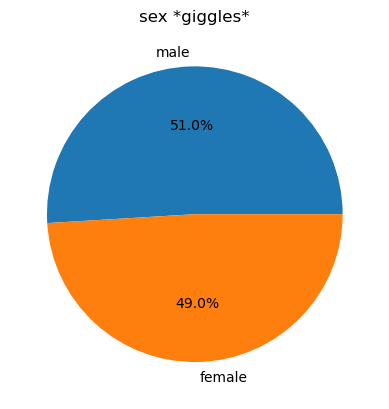

In [126]:
plt.pie(mouse_study0['Sex'].value_counts(), labels=('male', 'female'), autopct="%.1f%%")
plt.title('sex *giggles*')
plt.show()

In [127]:
mouse_study0['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

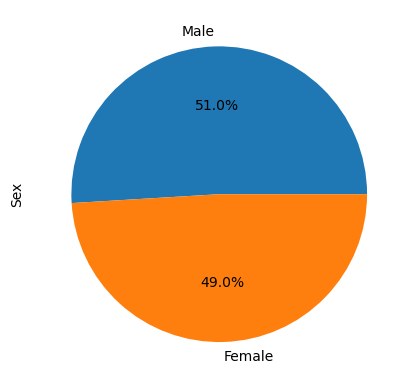

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [108]:
mouse_study0.sort_values(by=['Mouse ID', 'Timepoint'])
mouse_studyC = mouse_study0.loc[mouse_study0['Drug Regimen'] == ('Capomulin' or 'Ramicane' or 'Infubinol' or 'Ceftamin')]
mouse_studyC0 = mouse_studyC.groupby("Mouse ID").last()
mouse_studyR = mouse_study0.loc[mouse_study0['Drug Regimen'] == ('Ramicane')]
mouse_studyR0 = mouse_studyR.groupby("Mouse ID").last()
mouse_studyI = mouse_study0.loc[mouse_study0['Drug Regimen'] == ('Infubinol')]
mouse_studyI0 = mouse_studyI.groupby("Mouse ID").last()
mouse_studyCC = mouse_study0.loc[mouse_study0['Drug Regimen'] == ('Ceftamin')]
mouse_studyCC0 = mouse_studyCC.groupby("Mouse ID").last()
mouse_studyI0

Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
a203             45           67.973419                 2    Infubinol   
a251             45           65.525743                 1    Infubinol   
a577             30           57.031862                 2    Infubinol   
a685             45           66.083066                 3    Infubinol   
c139             45           72.226731                 2    Infubinol   
c326              5           36.321346                 0    Infubinol   
c895             30           60.969711                 2    Infubinol   
e476             45           62.435404                 1    Infubinol   
f345             45           60.918767                 1    Infubinol   
i386             40           67.289621                 4    Infubinol   
k483             45           66.196912                 3    Infubinol   
k804             35           62.117279                 2    Infubinol   
m756              5           47.010364                 1    Infubinol   
n671             30           60.165180                 0    Infubinol   
o809             35           55.629428                 1    Infubinol   
o813              5           45.699331                 0    Infubinol   
q132             30           54.656549                 4    Infubinol   
s121             25           55.650681                 2    Infubinol   
v339              5           46.250112                 0    Infubinol   
v719             20           54.048608                 1    Infubinol   
v766             15           51.542431                 1    Infubinol   
w193             20           50.005138                 0    Infubinol   
w584             30           58.268442                 1    Infubinol   
y163             45           67.685569                 3    Infubinol   
z581             45           62.754451                 3    Infubinol   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
a203      Female          20          23  
a251      Female          21          25  
a577      Female           6          25  
a685        Male           8          30  
c139        Male          11          28  
c326      Female          18          25  
c895      Female           7          29  
e476        Male          23          26  
f345        Male          23          26  
i386      Female          23          29  
k483      Female          20          30  
k804      Female          23          29  
m756        Male          19          30  
n671        Male          18          25  
o809        Male           3          25  
o813        Male          24          28  
q132      Female           1          30  
s121        Male          23          26  
v339        Male          20          26  
v719      Female          17          30  
v766        Male          16          27  
w193        Male          22          30  
w584        Male           3          29  
y163      Female          17          27  
z581      Female          24          25

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [134]:
treats = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
empty = []

quartilesC0 = mouse_studyC0["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqC0 = quartilesC0[.25]
upperqC0 = quartilesC0[.75]
iqrC0 = upperqC0-lowerqC0
lower_boundC0 = lowerqC0 - (1.5*iqrC0)
upper_boundC0 = upperqC0 + (1.5*iqrC0)
for value in mouse_studyC0["Tumor Volume (mm3)"]:
   if value > upper_boundC0:
       empty.append(value) 
   else:
        if value < lower_boundC0:
            empty.append(value)
print(str(empty)+ "is a potential outliar for Capomulin")
empty = []
            
    

quartilesR0 = mouse_studyR0["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqR0 = quartilesR0[.25]
upperqR0 = quartilesR0[.75]
iqrR0 = upperqR0-lowerqR0
lower_boundR0 = lowerqR0 - (1.5*iqrR0)
upper_boundR0 = upperqR0 + (1.5*iqrR0)
for value in mouse_studyR0["Tumor Volume (mm3)"]:
   if value > upper_boundR0:
       empty.append(value) 
   else:
        if value < lower_boundR0:
            empty.append(value)
print(str(empty)+ "is a potential outliar for Ramicane")
empty = []

quartilesI0 = mouse_studyI0["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqI0 = quartilesI0[.25]
upperqI0 = quartilesI0[.75]
iqrI0 = upperqI0-lowerqI0
lower_boundI0 = lowerqI0 - (1.5*iqrI0)
upper_boundI0 = upperqI0 + (1.5*iqrI0)
for value in mouse_studyI0["Tumor Volume (mm3)"]:
   if value > upper_boundI0:
       empty.append(value) 
   else:
        if value < lower_boundI0:
            empty.append(value)
print(str(empty)+ "is a potential outliar for Infubinol")
empty = []

quartilesCC0 = mouse_studyCC0["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqCC0 = quartilesCC0[.25]
upperqCC0 = quartilesCC0[.75]
iqrCC0 = upperqCC0-lowerqCC0
lower_boundCC0 = lowerqCC0 - (1.5*iqrCC0)
upper_boundCC0 = upperqCC0 + (1.5*iqrCC0)
for value in mouse_studyCC0["Tumor Volume (mm3)"]:
   if value > upper_boundCC0:
       empty.append(value) 
   else:
        if value < lower_boundCC0:
            empty.append(value)
print(str(empty)+ "is a potential outliar for Ceftamin")
empty = []

empty



[]is a potential outliar for Capomulin
[]is a potential outliar for Ramicane
[36.3213458]is a potential outliar for Infubinol
[]is a potential outliar for Ceftamin


[]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [137]:
mouse_studyCC0

Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
a275             45           62.999356                 3     Ceftamin   
b447              0           45.000000                 0     Ceftamin   
b487             25           56.057749                 1     Ceftamin   
b759             30           55.742829                 1     Ceftamin   
f436             15           48.722078                 2     Ceftamin   
h531              5           47.784682                 0     Ceftamin   
j296             45           61.849023                 3     Ceftamin   
k210             45           68.923185                 3     Ceftamin   
l471             45           67.748662                 1     Ceftamin   
l490             30           57.918381                 3     Ceftamin   
l558             10           46.784535                 0     Ceftamin   
l661             45           59.851956                 3     Ceftamin   
l733             45           64.299830                 1     Ceftamin   
o287             45           59.741901                 4     Ceftamin   
p438             45           61.433892                 1     Ceftamin   
q483             40           64.192341                 1     Ceftamin   
t573              0           45.000000                 0     Ceftamin   
u149             25           52.925348                 0     Ceftamin   
u153              0           45.000000                 0     Ceftamin   
w151             45           67.527482                 3     Ceftamin   
x226              0           45.000000                 0     Ceftamin   
x581             45           64.634949                 3     Ceftamin   
x822             45           61.386660                 3     Ceftamin   
y769             45           68.594745                 4     Ceftamin   
y865             45           64.729837                 3     Ceftamin   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
a275      Female          20          28  
b447        Male           2          30  
b487      Female           6          28  
b759      Female          12          25  
f436      Female           3          25  
h531        Male           5          27  
j296      Female          24          30  
k210        Male          15          28  
l471      Female           7          28  
l490        Male          24          26  
l558      Female          13          30  
l661        Male          18          26  
l733      Female           4          30  
o287        Male           2          28  
p438      Female          11          26  
q483        Male           6          26  
t573      Female          15          27  
u149        Male          24          29  
u153      Female          11          25  
w151        Male          24          25  
x226        Male          23          28  
x581      Female          19          28  
x822        Male           3          29  
y769      Female           6          27  
y865        Male          23          26

In [139]:
plot = pd.merge(pd.merge(pd.merge(mouse_studyC0, mouse_studyR0,"outer"), mouse_studyCC0, 'outer'),mouse_studyI0, 'outer')
plot

Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  \
0          45           38.982878                 2    Capomulin  Female   
1          45           38.939633                 0    Capomulin    Male   
2          20           30.485985                 0    Capomulin    Male   
3          45           37.074024                 1    Capomulin    Male   
4          45           40.159220                 2    Capomulin  Female   
..        ...                 ...               ...          ...     ...   
95         15           51.542431                 1    Infubinol    Male   
96         20           50.005138                 0    Infubinol    Male   
97         30           58.268442                 1    Infubinol    Male   
98         45           67.685569                 3    Infubinol  Female   
99         45           62.754451                 3    Infubinol  Female   

    Age_months  Weight (g)  
0            9          22  
1            7          21  
2           16          17  
3            3          19  
4           22          22  
..         ...         ...  
95          16          27  
96          22          30  
97           3          29  
98          17          27  
99          24          25  

[100 rows x 7 columns]

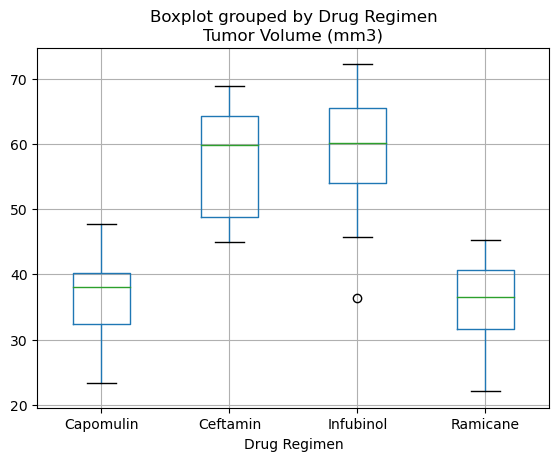

In [148]:

#ax1.set_ylabel('Final Tumor Volume (mm3)')
plot.boxplot('Tumor Volume (mm3)', by='Drug Regimen')
plt.show()

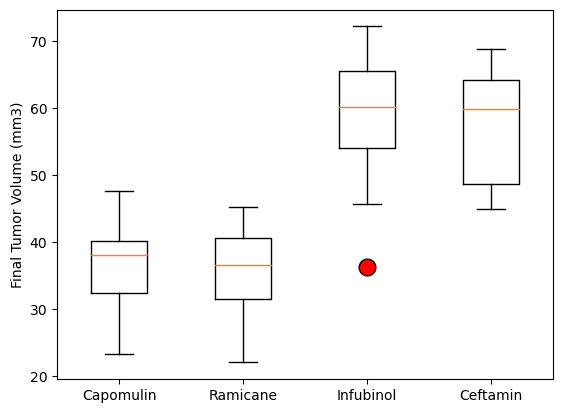

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

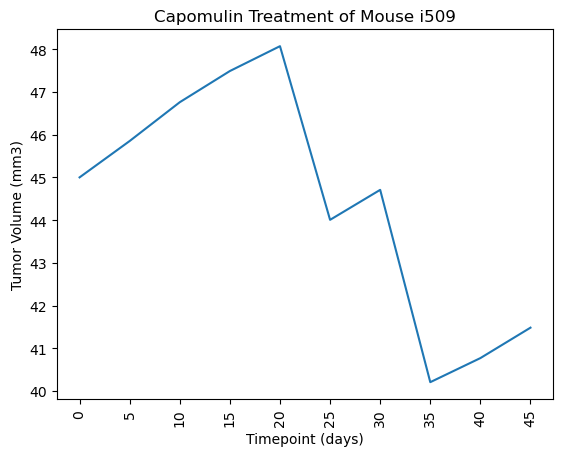

In [17]:
l509 = mouse_study0.loc[mouse_study0['Mouse ID'] =="l509"]
days =[value for value in l509['Timepoint'] ] 
x = np.arange(len(days))
size = l509['Tumor Volume (mm3)'] 
plt.plot(x, size)
plt.xticks(x,days, rotation=90)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse i509')
plt.show()

In [18]:
m509 = mouse_study0.loc[mouse_study0['Mouse ID'] =="l509"]
m509

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1721     l509          0           45.000000                 0    Capomulin   
1722     l509          5           45.851193                 0    Capomulin   
1723     l509         10           46.759074                 0    Capomulin   
1724     l509         15           47.488599                 1    Capomulin   
1725     l509         20           48.070452                 2    Capomulin   
1726     l509         25           44.006257                 2    Capomulin   
1727     l509         30           44.708055                 2    Capomulin   
1728     l509         35           40.207288                 2    Capomulin   
1729     l509         40           40.770813                 2    Capomulin   
1730     l509         45           41.483008                 3    Capomulin   

       Sex  Age_months  Weight (g)  
1721  Male          17          21  
1722  Male          17          21  
1723  Male          17          21  
1724  Male          17          21  
1725  Male          17          21  
1726  Male          17          21  
1727  Male          17          21  
1728  Male          17          21  
1729  Male          17          21  
1730  Male          17          21

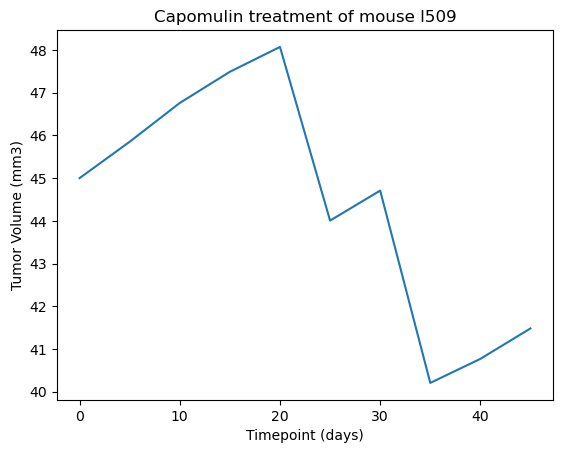

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [24]:
cap = mouse_study0.loc[mouse_study0['Drug Regimen'] =="Capomulin"]
capw = [cap['Mouse ID'].unique()]
tw = []
placer = cap['Mouse ID'].unique()
for placer in cap['Mouse ID']:
    tw.append(cap['Tumor Volume (mm3)'].mean())
tw


[40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741141,
 40.675741

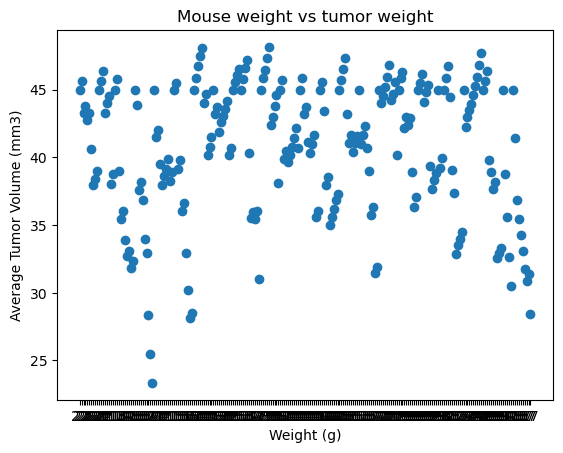

In [151]:
# drugs = [value for value in mouse_study0['Drug Regimen'].unique()]
# x = np.arange(len(drugs))
# counts = mouse_study0['Drug Regimen'].value_counts()
# plt.bar(x, counts)
# plt.xticks(x,drugs, rotation=90)
# plt.xlabel('Drug Regimen')
# plt.ylabel('# Of Observed Mouse Timepoints')
# plt.show()

tw =[value for value in cap['Tumor Volume (mm3)'] ] 
mw =[value for value in cap['Weight (g)'] ] 
x = np.arange(len(mw)) 
plt.scatter(x, tw)
plt.xticks(x,mw)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs tumor weight')
plt.show()

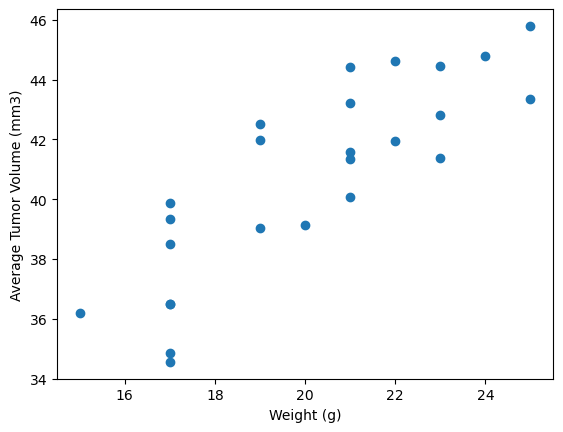

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

NameError: name 'y' is not defined

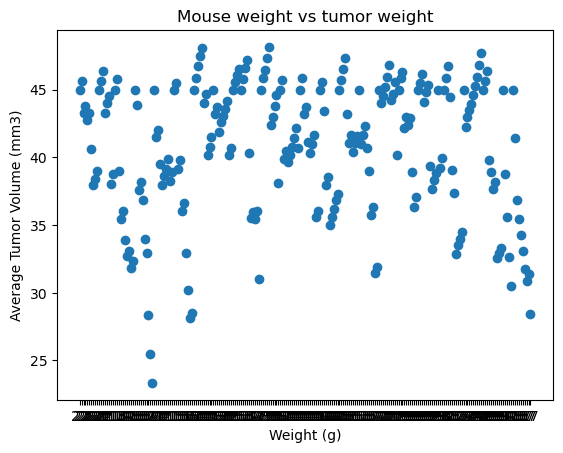

In [153]:
#couldnt figure out how to get the previous graph isolated to the singular regime, nor putting the reg line thru the wrong graph. will finih

#https://www.delftstack.com/howto/python-pandas/pandas-scatter-plot-regression-line/
tw =[value for value in cap['Tumor Volume (mm3)'] ] 
mw =[value for value in cap['Weight (g)'] ] 
x = np.arange(len(mw)) 
plt.scatter(x, tw)
plt.xticks(x,mw)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs tumor weight')
m, b = np.polyfit(x, y, 1)
plt.plot(x,m*x+b)
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


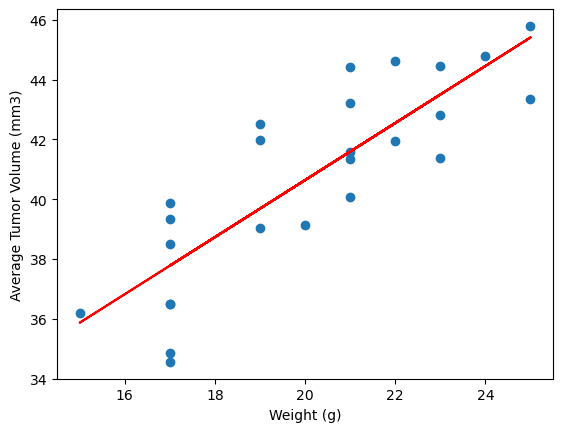

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
